In [ ]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/home_credit/application_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [ ]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [ ]:
df.shape

(307511, 58)

In [ ]:
# Cleaning the missing data
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

**Handle Missing Value**

In [ ]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [ ]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df[df['CODE_GENDER']=='XNA'].shape
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [ ]:
# Creating Age Column
df['Age'] = (df['DAYS_REGISTRATION']-df['DAYS_BIRTH'])/365

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,15.926027
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,42.682192
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,40.509589
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,25.128767
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,42.797260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,2.386301
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,44.895890
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,22.545205
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,25.750685


In [ ]:
#mengecek apakah dataset memiliki data duplikat
df[df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age


In [ ]:
df.shape

(307508, 59)

In [ ]:
df.TARGET.value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

In [ ]:
print(df.TARGET.value_counts(normalize=True)*100)
print('\n')

0    91.927039
1     8.072961
Name: TARGET, dtype: float64




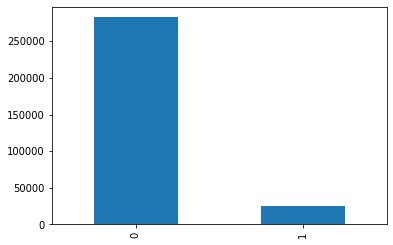

In [ ]:
df.TARGET.value_counts().plot(kind='bar')

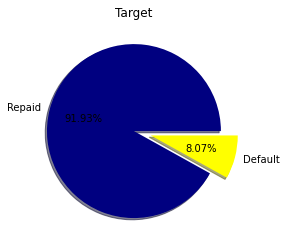

In [ ]:
label = ('Repaid', 'Default')
color = ('navy','yellow')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Perbedaan proporsi label yang signifikan pada kasus klasifikasi dapat menyebabkan komputer/mesin tidak dapat belajar dengan baik sehingga model yang terbentuk hanya dapat mengenali label yang dominan.Ada perbedaan yang signifikan dalam proporsi label dalam dataset ini

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


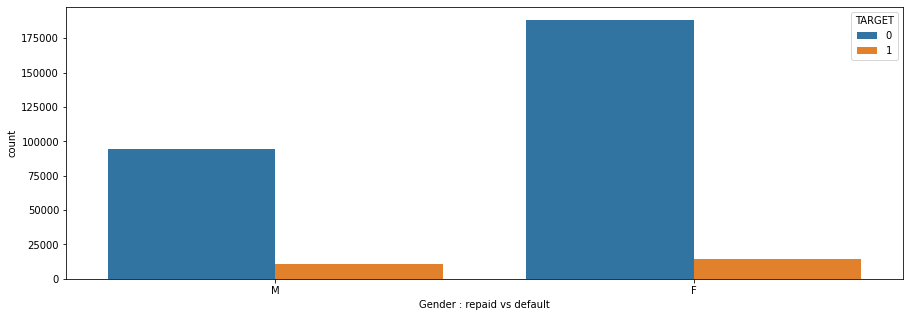

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('CODE_GENDER',hue='TARGET',data=df)
plt.xlabel('Gender : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


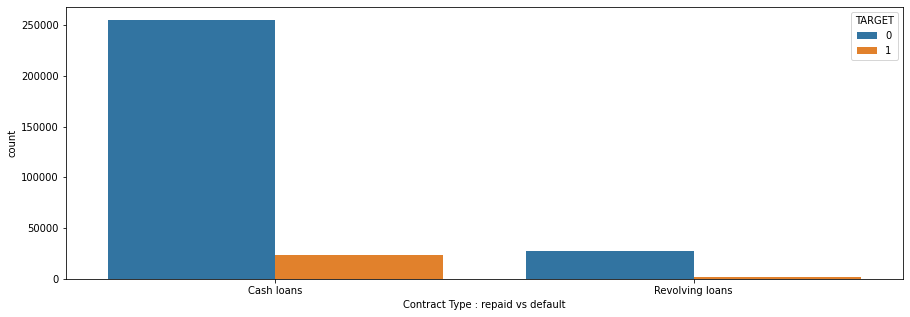

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=df)
plt.xlabel('Contract Type : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13999fd410>,
      dtype=object)

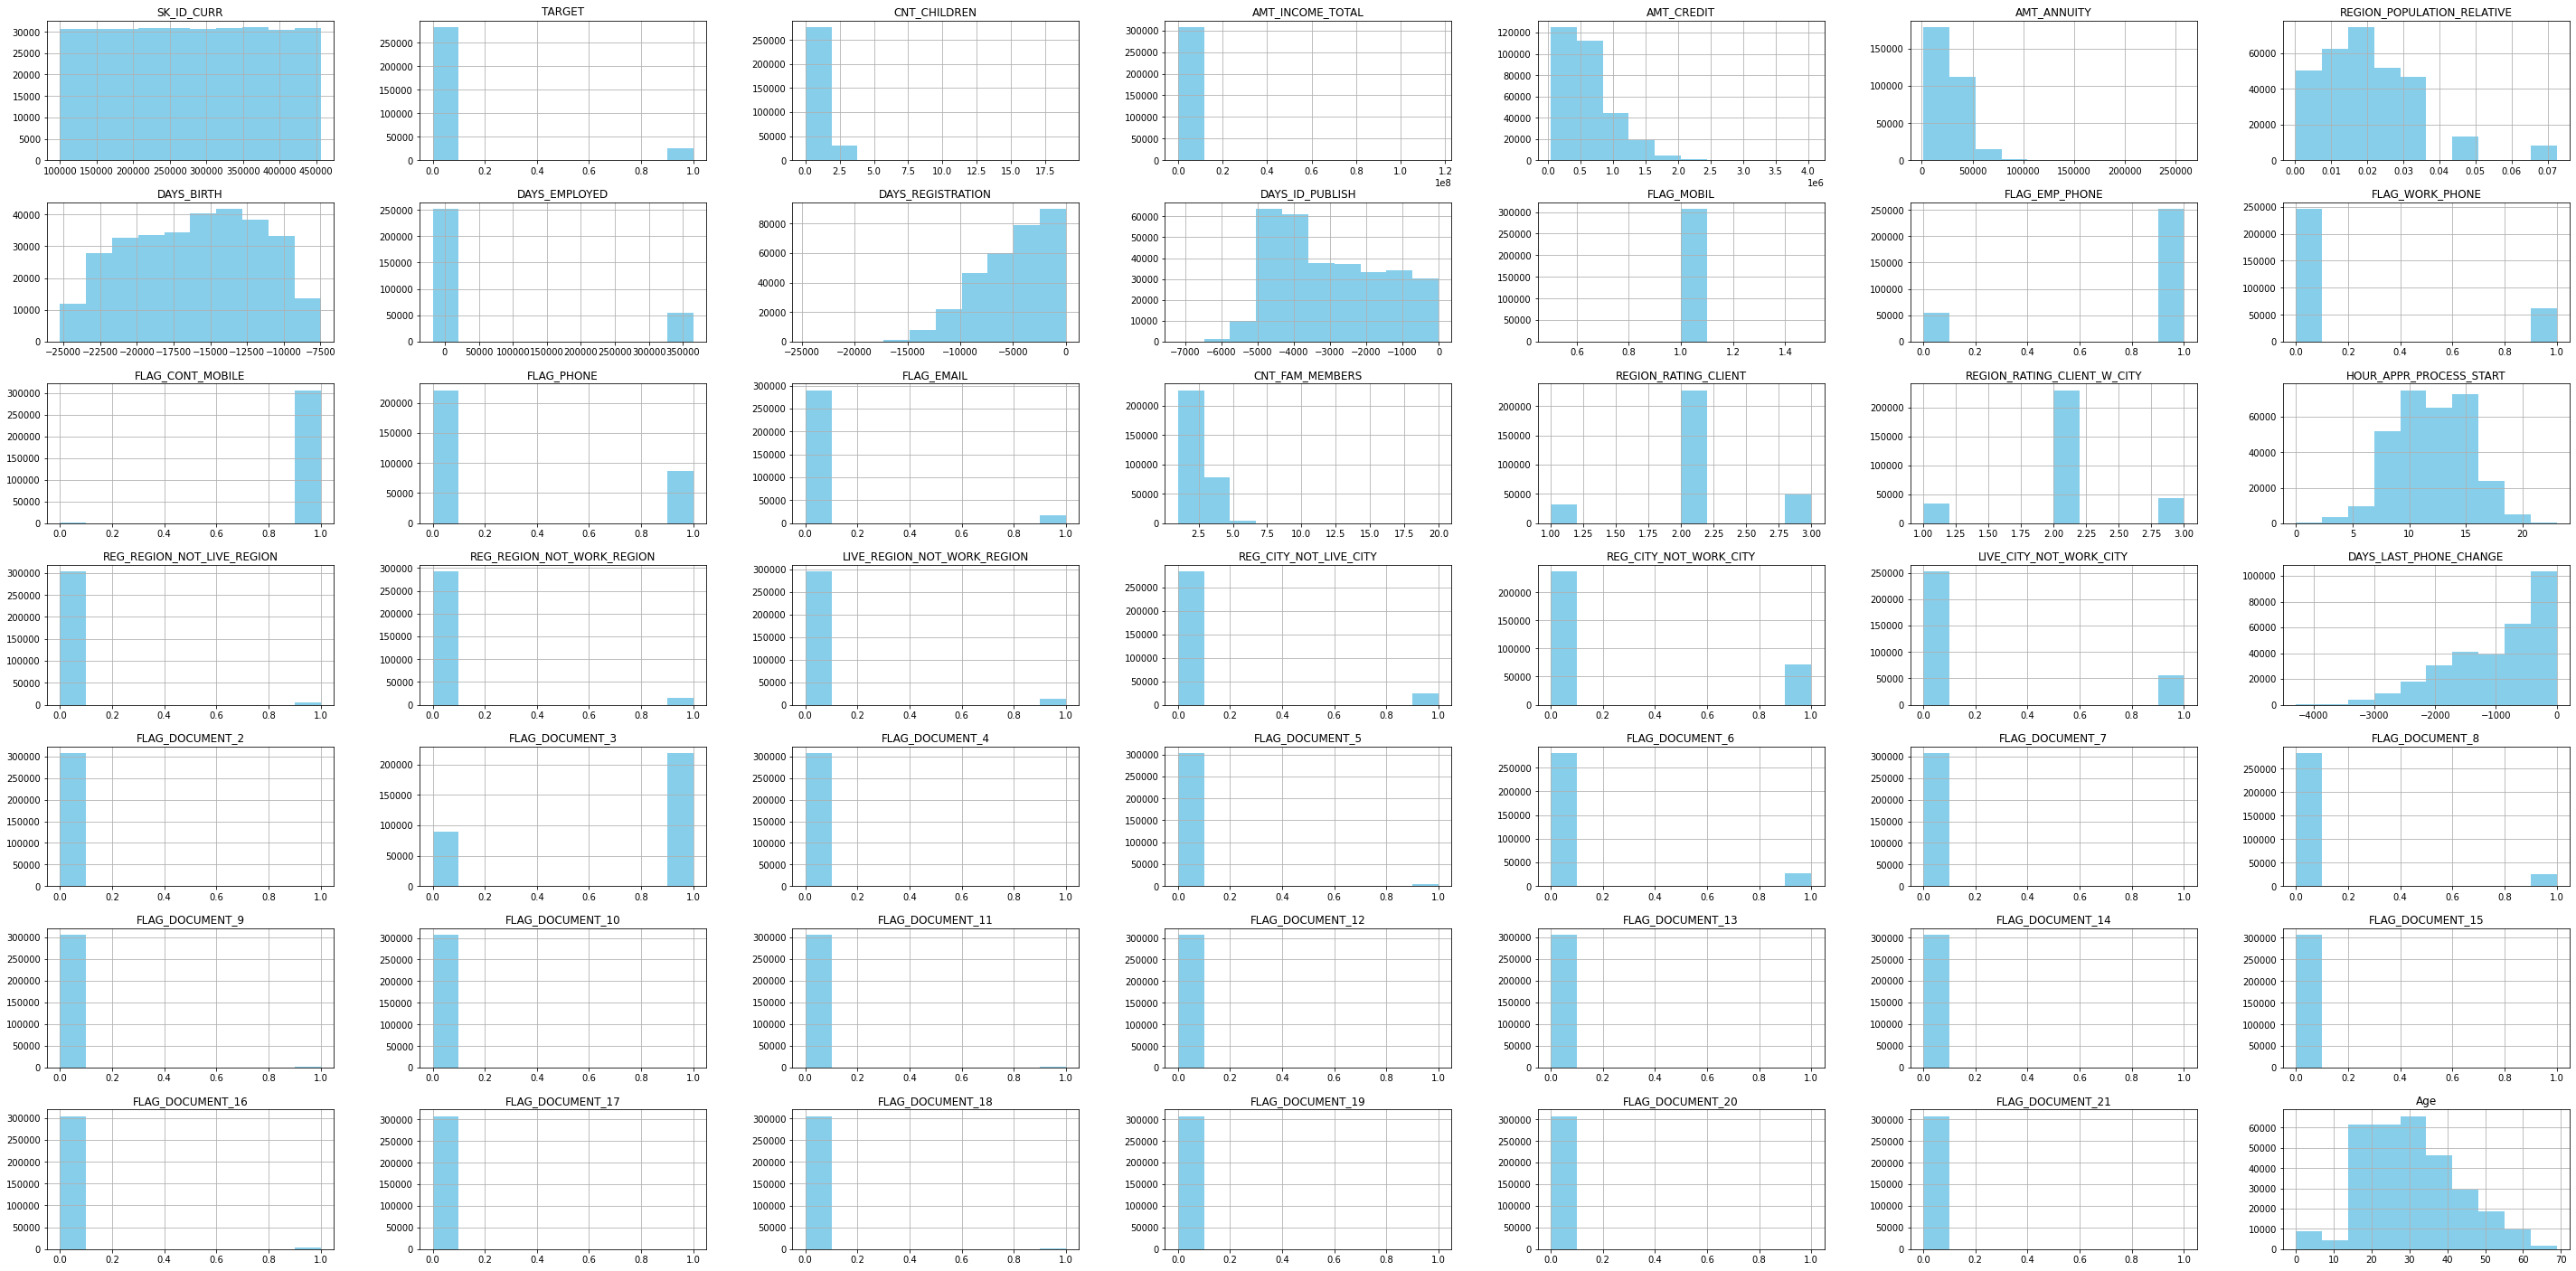

In [ ]:
df.hist(figsize=(50,25),color='skyblue')

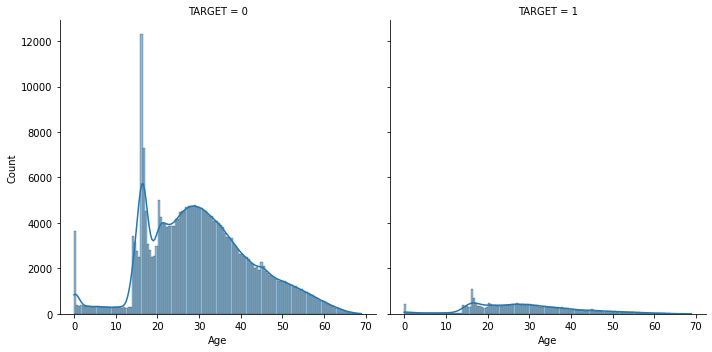

In [ ]:
sns.displot(data=df, x="Age", col='TARGET', kde=True)
plt.show()

**Correlation**

In [ ]:
# heatmap

#plt.figure(figsize = (100, 60))

#corr = df.corr()

#sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
#plt.show()

In [ ]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078243
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050996
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044342
DAYS_REGISTRATION              0.041976
LIVE_CITY_NOT_WORK_CITY        0.032520
FLAG_WORK_PHONE                0.028526
CNT_CHILDREN                   0.019186
CNT_FAM_MEMBERS                0.009308
REG_REGION_NOT_WORK_REGION     0.006946
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002824
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5               -0.000308
FLAG_DOCUMENT_12              -0.000756
FLAG_DOCUMENT_19              -0.001358


In [ ]:
#checking number of unique values
df.nunique()

SK_ID_CURR                     307508
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATIN

In [ ]:
# dropping columns which are not necessary for prediction

to_drop = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  NAME_INCOME_TYPE             307508 non-null  object 
 11  NAME_EDUCATION_TYPE          307508 non-null  object 
 12  NAME_FAMILY_STATUS           307508 non-null  object 
 13 

**Encoding Categorical Columns**

In [ ]:
encoding = {"NAME_CONTRACT_TYPE": {"Cash loans": 0, "Revolving loans": 1}, "CODE_GENDER": {"F": 0, "M": 1}, "FLAG_OWN_CAR": {"N": 0, "Y": 1},
            "FLAG_OWN_REALTY": {"N": 0, "Y": 1}}
df.replace(encoding, inplace=True)

In [ ]:
# One-hot encode the data using pandas get_dummies
dataset = pd.get_dummies(df)
dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,1,0,0,1,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,0,0,0,0,1,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,1,0,0,1,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,1,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,1,0,0,0,0,0,0,0,1
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,1,0,1,0,0,0,0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,1,0,0,0,1,0,0,0,0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
dataset.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307508 non-null  int64  
 1   TARGET                                             307508 non-null  int64  
 2   NAME_CONTRACT_TYPE                                 307508 non-null  int64  
 3   CODE_GENDER                                        307508 non-null  int64  
 4   FLAG_OWN_CAR                                       307508 non-null  int64  
 5   FLAG_OWN_REALTY                                    307508 non-null  int64  
 6   CNT_CHILDREN                                       307508 non-null  int64  
 7   AMT_INCOME_TOTAL                                   307508 non-null  float64
 8   AMT_CREDIT                                         307508 non-null  float6

In [ ]:
#Separating the feature and target columns
X = dataset.drop('TARGET', axis = 1)
y = dataset['TARGET']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

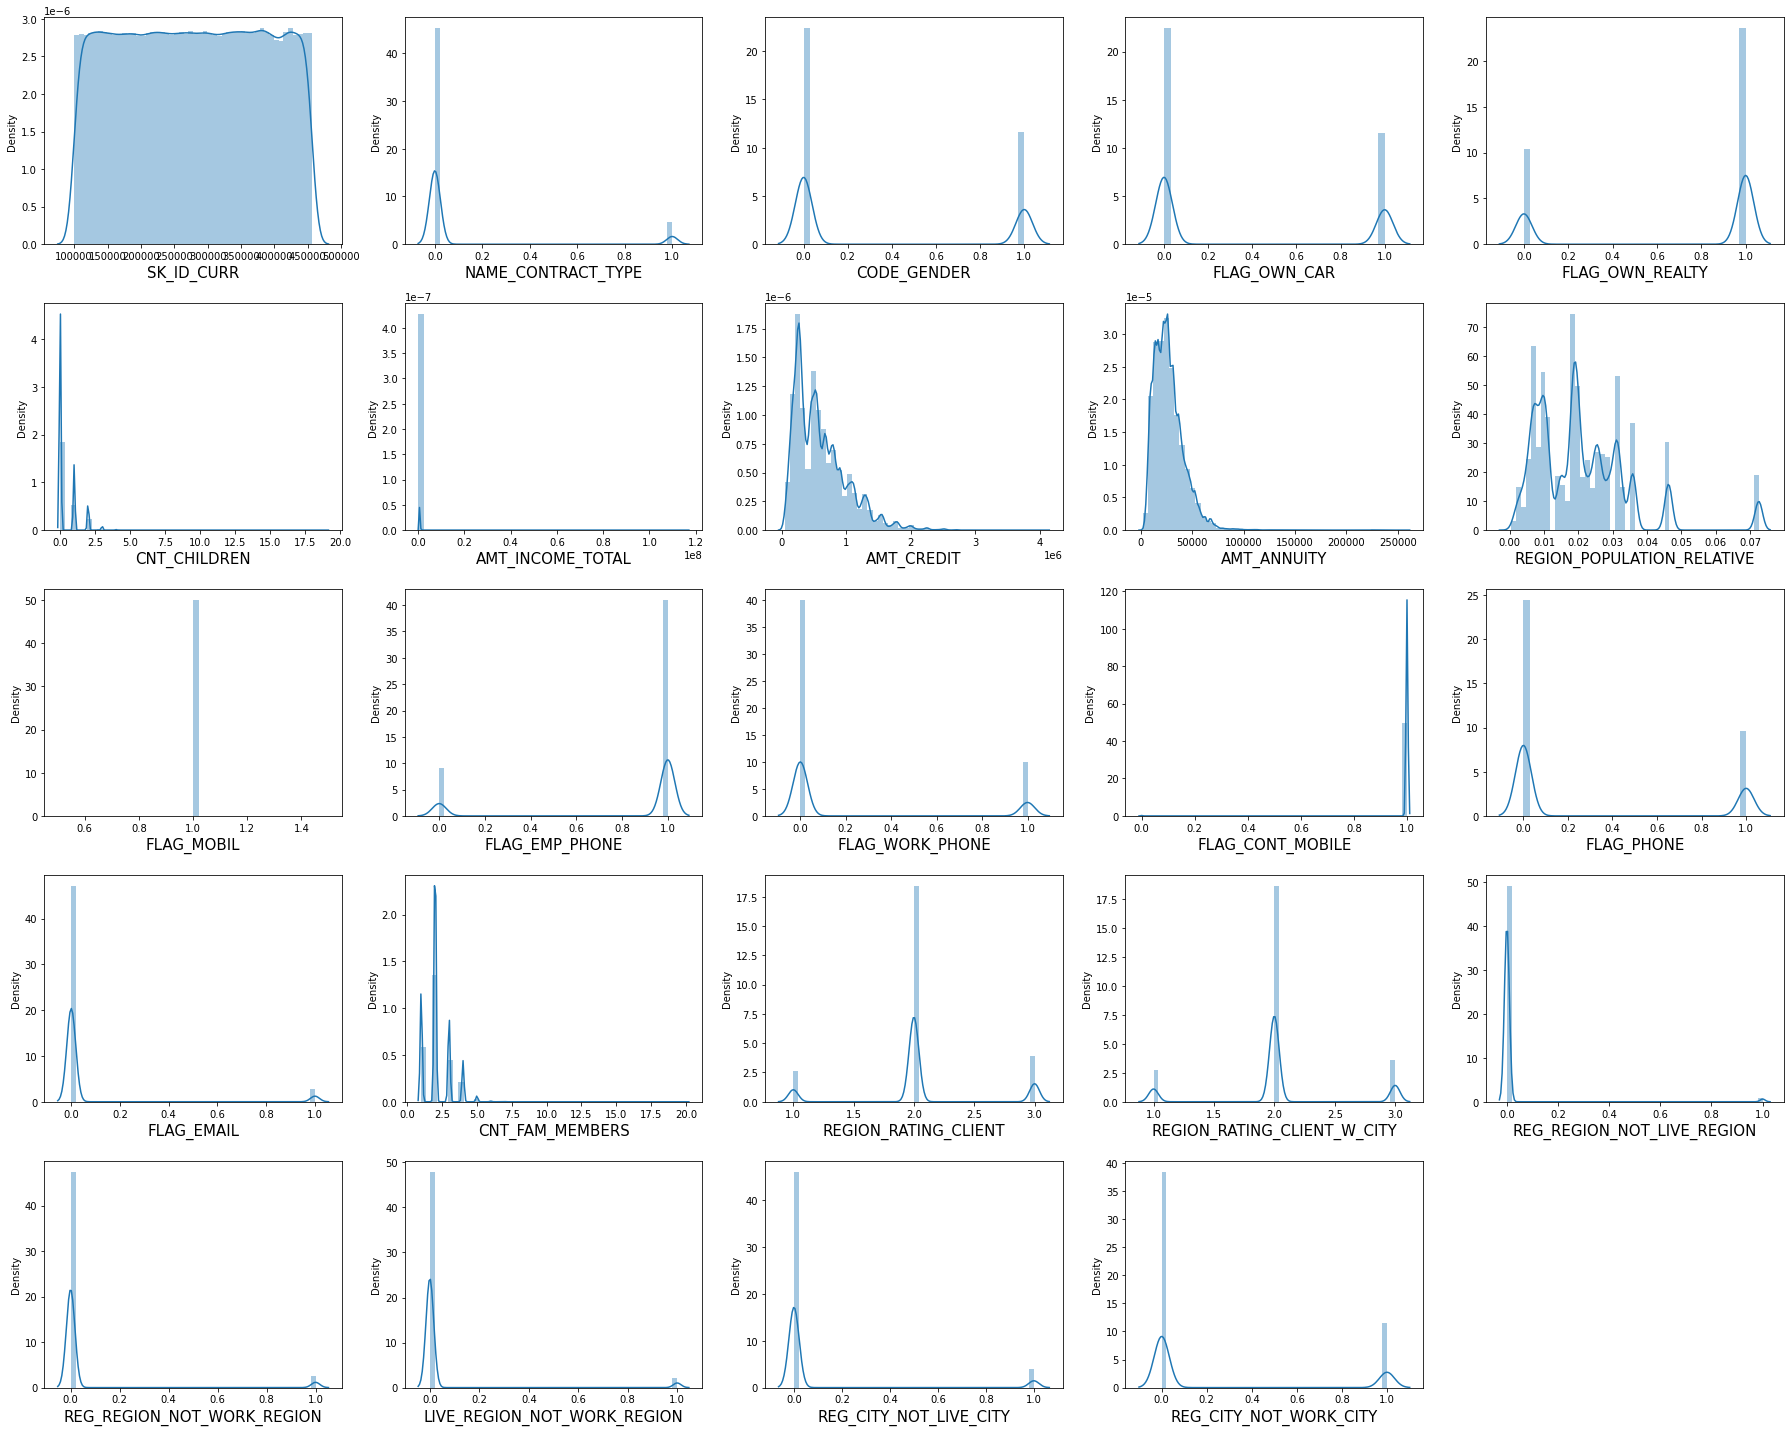

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

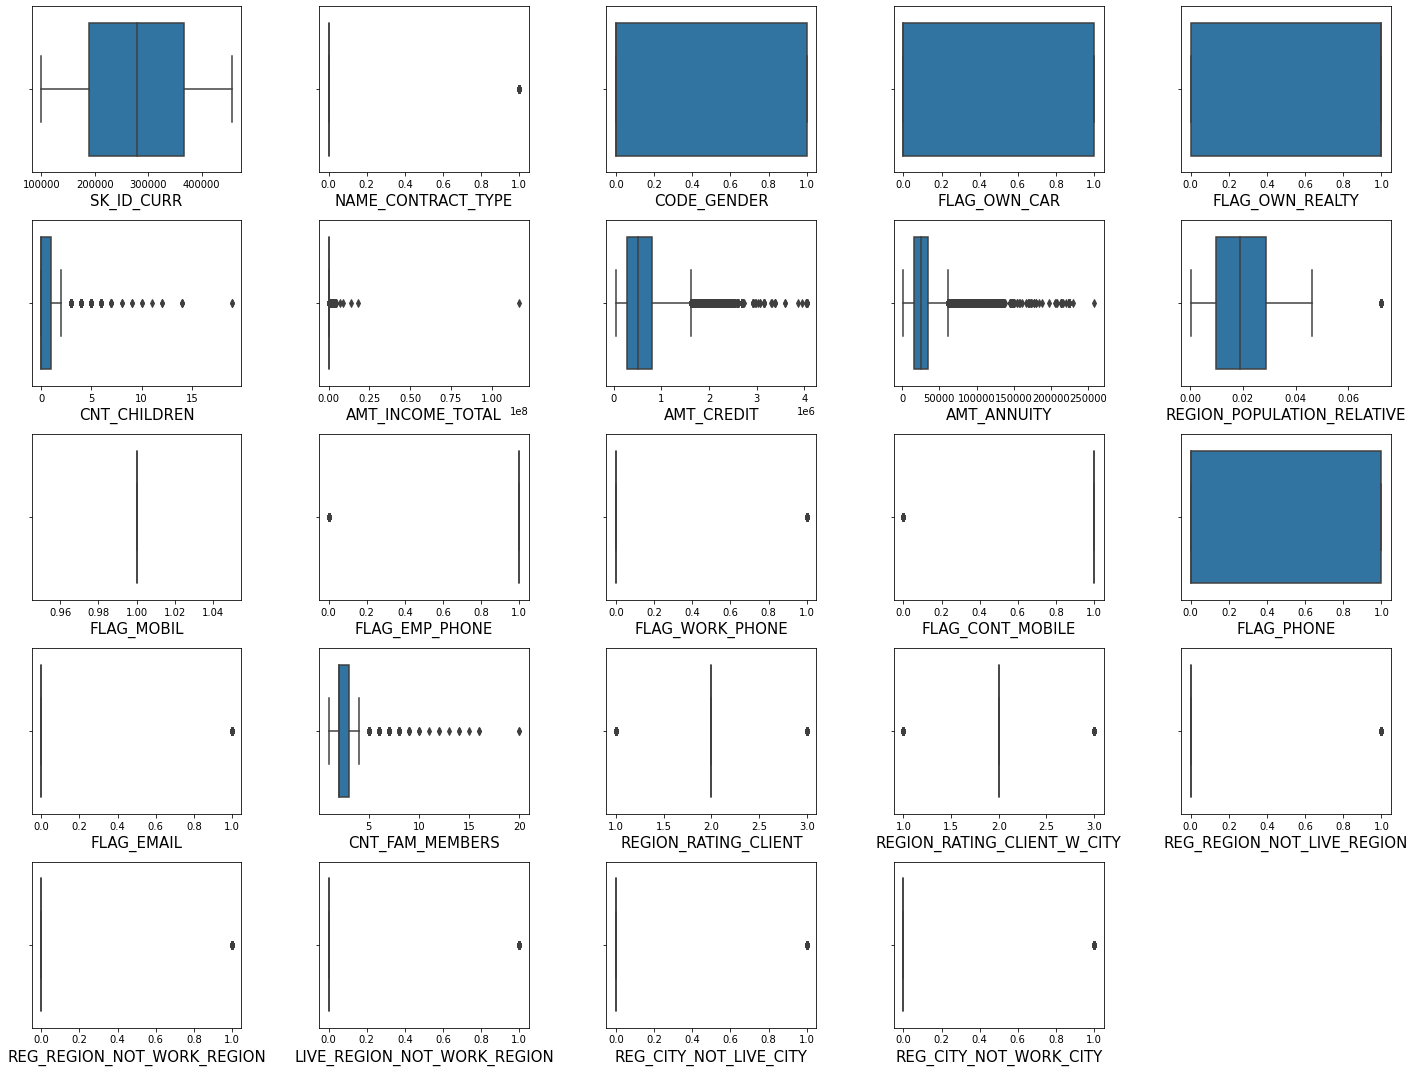

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

Handling Outliers

In [ ]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
               'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS']
for i in X[outlier_list]:
    X[i]=treat_outlier(X[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

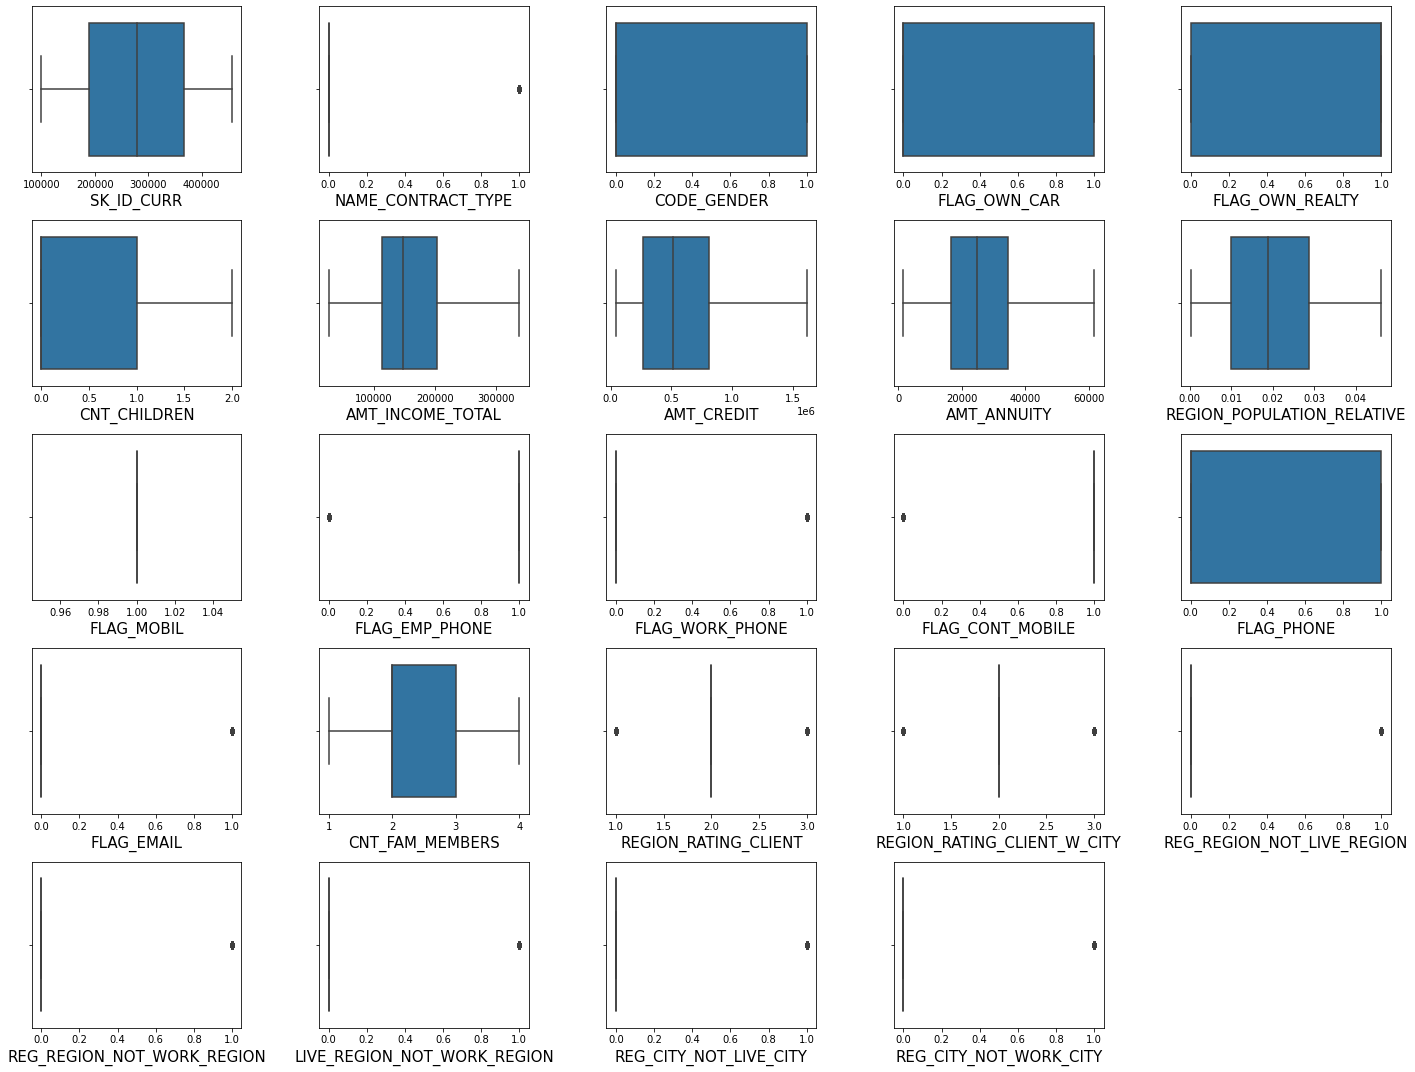

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# data_prep = pd.concat([X, y], axis = 1)

In [ ]:
# data_prep.to_csv('data_prepro.csv', index = False)

In [ ]:
# from sklearn.model_selection import train_test_split

# training_data, testing_data = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#training_data.to_csv('data_train.csv', index = False)
# testing_data.to_csv('data_test.csv', index = False)

In [ ]:
# X.to_csv('data_prepro.csv', index = False)
#X_test.to_csv('data_test.csv', index = False)

**Normalization**

In [ ]:
num_df = X_train.select_dtypes(include = ['int64','float64'])

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)

In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age
233233,0.758295,0.0,1.0,1.0,1.0,0.5,1.000000,0.400947,0.660538,0.309819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565581
291639,0.948368,0.0,0.0,1.0,1.0,0.5,0.711400,0.486006,0.364931,0.102591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353504
31466,0.102461,0.0,0.0,0.0,0.0,0.0,0.177489,0.114556,0.333886,0.309819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.768986
266871,0.867880,1.0,0.0,0.0,1.0,0.0,0.278499,0.171835,0.230578,0.409558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352549
268208,0.872360,0.0,0.0,0.0,0.0,1.0,0.422799,0.257752,0.562203,0.772959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215341


In [ ]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [ ]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [ ]:
X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
233233,0.758295,0.0,1.0,1.0,1.0,0.5,1.000000,0.400947,0.660538,0.309819,...,1,0,0,0,0,1,0,0,0,0
291639,0.948368,0.0,0.0,1.0,1.0,0.5,0.711400,0.486006,0.364931,0.102591,...,0,0,0,0,0,1,0,0,0,0
31466,0.102461,0.0,0.0,0.0,0.0,0.0,0.177489,0.114556,0.333886,0.309819,...,0,0,1,0,0,1,0,0,0,0
266871,0.867880,1.0,0.0,0.0,1.0,0.0,0.278499,0.171835,0.230578,0.409558,...,1,0,0,0,0,1,0,0,0,0
268208,0.872360,0.0,0.0,0.0,0.0,1.0,0.422799,0.257752,0.562203,0.772959,...,1,0,0,0,0,0,0,0,0,1


**Balancing the Dataset using Undersampling**


In [ ]:
# from imblearn.over_sampling import SMOTE 

# OS_SMOTE = SMOTE()

# X_train, y_train = OS_SMOTE.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#rUs = RandomUnderSampler(sampling_strategy=1) # Float
rus = RandomUnderSampler(sampling_strategy="not minority") # String #parameter sampling_strategy untuk mentuning brapa persen balancenya 
X_res, y_res = rus.fit_resample(X_train, y_train)

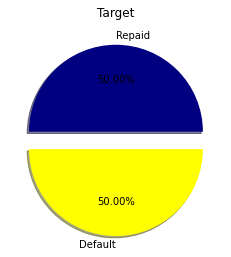

In [ ]:
label = ('Repaid', 'Default')
color = ('navy','yellow')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    y_res.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

   Labels  TARGET
0       0   19866
1       1   19866


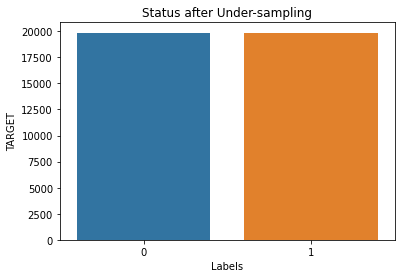

In [ ]:
usampling_plot = y_res.value_counts().reset_index()
usampling_plot.columns = ['Labels','TARGET']
print(usampling_plot)
sns.barplot(x='Labels',y='TARGET',data=usampling_plot);
plt.title('Status after Under-sampling');

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=42)

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_res, y_res)
gs_rfc.best_params_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'classifier': RandomForestClassifier(max_depth=10, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100}

In [ ]:
# Test data performance
from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test), y_test))

Test Accuracy Score: 0.8955968911580111
Test Precision: 0.045573704375882235
Test Recall: 0.1180773249738767


In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_res, gs_rfc.predict(X_res))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 0.6775646833786368
Test accuracy of Random Forest Classifier is : 0.8955968911580111
[[54855  1688]
 [ 4733   226]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56543
           1       0.12      0.05      0.07      4959

    accuracy                           0.90     61502
   macro avg       0.52      0.51      0.51     61502
weighted avg       0.86      0.90      0.87     61502



In [ ]:
#X_train.columns.to_list()

In [ ]:
# feature_imp = pd.Series(clf1.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# feature_imp.head(25)
# #print(feature_imp.iloc[61:90])